In [15]:
# Support Vector Machines (SVM) - Linear & Non-linear
# Objective: Use SVMs for linear and non-linear classification
# Tools: Scikit-learn, NumPy, Matplotlib

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
df=pd.read_csv('/content/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# 2 Linear kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(X_train, y_train)

SVC()

In [19]:
# 3 Evaluate Models
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("----- Linear Kernel Performance -----")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

print("----- RBF Kernel Performance -----")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

----- Linear Kernel Performance -----
Accuracy: 0.956140350877193
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.96      0.96        71
           M       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

----- RBF Kernel Performance -----
Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



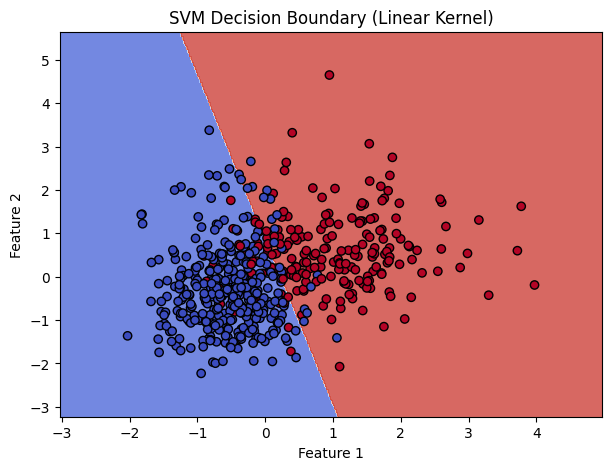

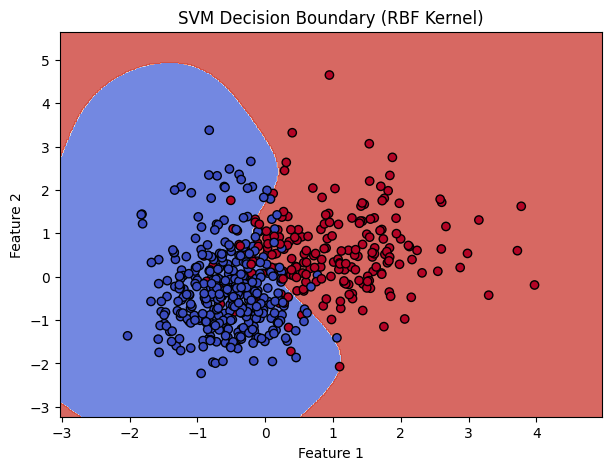

In [20]:
# 4 Visualize Decision Boundary (for 2D data only)
# Use only first two features for visualization
X_vis = X[:, :2]
y_vis = y

# Convert categorical labels to numerical for plotting
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)


# Train new models for visualization
svm_linear_vis = SVC(kernel='linear', C=1.0)
svm_rbf_vis = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_linear_vis.fit(X_vis, y_vis_encoded) # Use encoded labels for training
svm_rbf_vis.fit(X_vis, y_vis_encoded) # Use encoded labels for training

def plot_svm(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm) # Use encoded labels for scatter plot
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_svm(svm_linear_vis, X_vis, y_vis_encoded, "SVM Decision Boundary (Linear Kernel)")
plot_svm(svm_rbf_vis, X_vis, y_vis_encoded, "SVM Decision Boundary (RBF Kernel)")

In [21]:
# 5 Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("\nBest Parameters Found:", grid.best_params_)

# Evaluate best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\n----- Best Model Performance -----")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best Parameters Found: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

----- Best Model Performance -----
Accuracy: 0.9824561403508771
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [23]:
# 6 Cross-Validation Score
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.97368421 0.97368421 0.98245614 0.96491228 0.98230088]
Average CV Accuracy: 0.9754075454122031
